In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)#

    except RuntimeError as e:
        print(e)
        


In [2]:
print(gpus)
print("Kernel Loaded!")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Kernel Loaded!


In [3]:
#import tensorflow as tf
#from keras.backend.tensorflow_backend import set_session

#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#sess = tf.Session(config=config)
#set_session(sess)

In [4]:
"""

This is for morphological classification of galaxies by CNN,
By Kenji Bekki, on 2020/2/14 for Nair & Abraham 2010

"""


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.models import model_from_json
import keras.callbacks
import numpy as np
#import keras.backend.tensorflow_backend as KTF
#import tensorflow as tf
import os.path


### Total model number = (nmodle0) * nmodel

#iset=int(input('Input the total number of sets of models '))
#nmodel0=int(input('Input the total number of images per model'))
#nmodel=nmodel0*iset
nmodel=2000
print('nmodel',nmodel)

### Original values
#batch_size = 128
#num_classes = 10
#epochs = 12
batch_size = 1
#num_classes = 5
num_classes = 2
epochs = 30
nb_epoch=epochs
n_mesh=50
#nmodel=1000
print('nmodel',nmodel)
print('num_classes',num_classes)

img_rows, img_cols = n_mesh, n_mesh
n_mesh2=n_mesh*n_mesh-1
n_mesh3=n_mesh*n_mesh


print(img_rows, img_cols, n_mesh2)
#stop



#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)
print(input_shape)
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255
#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')
#print(y_test.shape[0], 'y.test samples')
#print(str(y_test[0]))
#print(str(y_test[1]))
#print(str(y_test[2]))

#y_train = y_train.astype('int32')
#y_test = y_test.astype('int32')
#y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
#y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)

nmodel 2000
nmodel 2000
num_classes 2
50 50 2499
(50, 50, 1)


In [5]:
def old():
    # This is for simlation data sets
    GD_W_DISC_PATH = "../generated_data/data3/"
    GD_WO_DISC_PATH = "../generated_data/data4/"

    GD_FN = "2dft.dat"
    DATA_PART_NMODEL = int(nmodel/2)


    def load_data(path, filename):
        return np.genfromtxt(os.path.join(path, filename), autostrip=True, max_rows=DATA_PART_NMODEL*n_mesh3)

    x_dataset_wd = load_data(GD_W_DISC_PATH, GD_FN)
    y_dataset_wd = np.ones((DATA_PART_NMODEL, 1), np.int)

    x_dataset_wod = load_data(GD_WO_DISC_PATH, GD_FN)
    y_dataset_wod = np.zeros((DATA_PART_NMODEL, 1), np.int)

    x_dataset = np.append(x_dataset_wd, x_dataset_wod, axis=0)
    y_dataset = np.append(y_dataset_wd, y_dataset_wod, axis=0)

    np.savetxt("2dft.dat", x_dataset, '%1.8f')
    np.savetxt("2dftn.dat", y_dataset, '%d')

    x_dataset = x_dataset.reshape(nmodel, img_rows, img_cols, 1)
    print(x_dataset.shape)
    print(y_dataset.shape)

In [6]:
%run ../data_preparation/FILE_IO_FUNCTIONS.ipynb
#x_dataset, y_dataset = load_total_combined_data(data_param="MEDIUM_LARGE_DISCS")
x_dataset, y_dataset = load_total_combined_data_DR15()
nmodel = y_dataset.shape[0]
input_shape = x_dataset[0].shape

In [7]:
def new_old():
    %run ../data_preparation/FILE_IO_FUNCTIONS.ipynb
    nmodel_part = int(nmodel/2)
    x_dataset_wd = load_data(data="DATA3", count=nmodel_part)
    x_dataset_wod = load_data(data="DATA4", count=nmodel_part)

    y_dataset_wd = np.ones((x_dataset_wd.shape[0], 1), np.int)
    y_dataset_wod = np.zeros((x_dataset_wod.shape[0], 1), np.int)

    x_dataset = np.append(x_dataset_wd, x_dataset_wod, axis=0)
    y_dataset = np.append(y_dataset_wd, y_dataset_wod, axis=0)

In [8]:
%run ../data_preparation/PRE_PROCESSING.ipynb
#add_gaussian_noise(x_dataset)
#add_point_sources(x_dataset)
#add_point_sources_new(x_dataset)

print(x_dataset.shape)
print(y_dataset.shape)

unique, counts = np.unique(y_dataset, return_counts=True)
print(np.asarray((unique, counts)).T)

print(y_dataset[0])

(79, 50, 50, 1)
(79,)
[[ 0 43]
 [ 1 36]]
1


float64
(50, 50, 1)


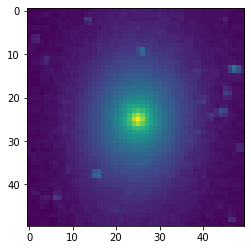

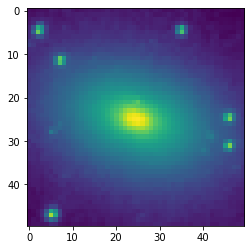

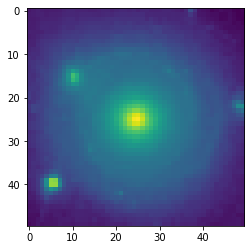

In [9]:
from matplotlib import image
from matplotlib import pyplot

# summarize shape of the pixel array
print(x_dataset[0].dtype)
print(x_dataset[0].shape)
# display the array of pixels as an image
pyplot.imshow(x_dataset[0])
pyplot.show()
pyplot.imshow(x_dataset[1])
pyplot.show()
pyplot.imshow(x_dataset[2])
pyplot.show()

[59 59 39 74 52 46 41 25 47 49 46  2 21 19 59 38  4 23 74 57 25 73 17 71
 11]


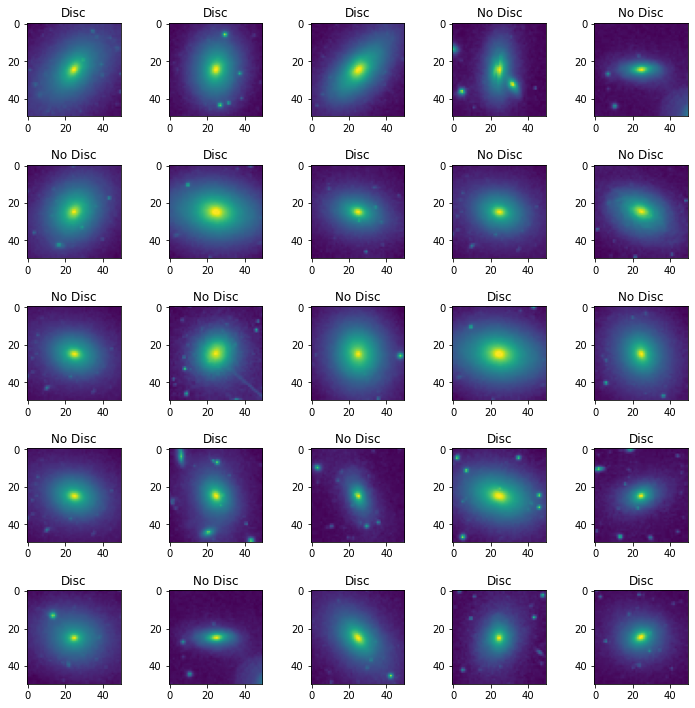

In [10]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10, 10]
mpl.rcParams['figure.dpi'] = 72
%run ..\helpers\plotting_helpers.ipynb
plot_classification_results(images=x_dataset, y_preds=y_dataset, y_trues=y_dataset, y_labels=("No Disc", "Disc"), random_sample=True)

In [11]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_dataset, y_dataset, train_size=0.4, random_state=1)

In [12]:
#x_train = x_dataset; x_test = x_train; y_train = y_dataset; y_test = y_train

In [13]:
#np.savetxt("2dfv_test_split.dat", x_test.flatten())
#np.savetxt("2dftn_test_split.dat", y_test, '%d')

In [14]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [15]:
def old_train():
    #stop

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
              verbose=1, validation_data=(x_test, y_test))

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])


    print('save the architecture of a model')

    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)

    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")


In [16]:
x_val, Y_val = load_total_combined_data_DR15()


print(x_val[1])
print(Y_val[1])
Y_val = keras.utils.np_utils.to_categorical(Y_val, num_classes)

[[[0.03553299]
  [0.03045685]
  [0.04060914]
  ...
  [0.01522843]
  [0.00507614]
  [0.02030457]]

 [[0.05076142]
  [0.04568528]
  [0.06598985]
  ...
  [0.        ]
  [0.00507614]
  [0.01522843]]

 [[0.06598985]
  [0.09137056]
  [0.09137056]
  ...
  [0.01522843]
  [0.02030457]
  [0.01522843]]

 ...

 [[0.01522843]
  [0.02030457]
  [0.05076142]
  ...
  [0.08629442]
  [0.05583756]
  [0.05076142]]

 [[0.01522843]
  [0.05076142]
  [0.03553299]
  ...
  [0.06598985]
  [0.05583756]
  [0.07106599]]

 [[0.02030457]
  [0.04568528]
  [0.05076142]
  ...
  [0.06598985]
  [0.07106599]
  [0.07614213]]]
1


In [17]:
print(x_val.shape)
print(Y_val.shape)

(79, 50, 50, 1)
(79, 2)


In [18]:
print(x_test.shape)
print(y_test.shape)

(48, 50, 50, 1)
(48, 2)


In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adadelta(learning_rate=1.0),
                  metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_val, Y_val))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


print('save the architecture of a model')

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Epoch 1/30
31/31 [==============================] - 3s 42ms/step - loss: 0.8082 - accuracy: 0.3392 - val_loss: 0.7402 - val_accuracy: 0.4557
Epoch 2/30
31/31 [==============================] - 0s 12ms/step - loss: 0.6662 - accuracy: 0.7301 - val_loss: 0.6914 - val_accuracy: 0.5443
Epoch 3/30
31/31 [==============================] - 0s 12ms/step - loss: 0.6899 - accuracy: 0.6272 - val_loss: 0.7175 - val_accuracy: 0.4557
Epoch 4/30
31/31 [==============================] - 0s 12ms/step - loss: 0.6785 - accuracy: 0.6876 - val_loss: 0.7436 - val_accuracy: 0.4557
Epoch 5/30
31/31 [==============================] - 0s 12ms/step - loss: 0.7266 - accuracy: 0.5372 - val_loss: 1.0395 - val_accuracy: 0.4557
Epoch 6/30
31/31 [==============================] - 0s 12ms/step - loss: 0.7377 - accuracy: 0.7431 - val_loss: 0.6852 - val_accuracy: 0.7089
Epoch 7/30
31/31 [==============================] - 0s 12ms/step - loss: 0.6720 - accuracy: 0.6033 - val_loss: 0.7004 - val_accuracy: 0.4557
Epoch 8/30
31

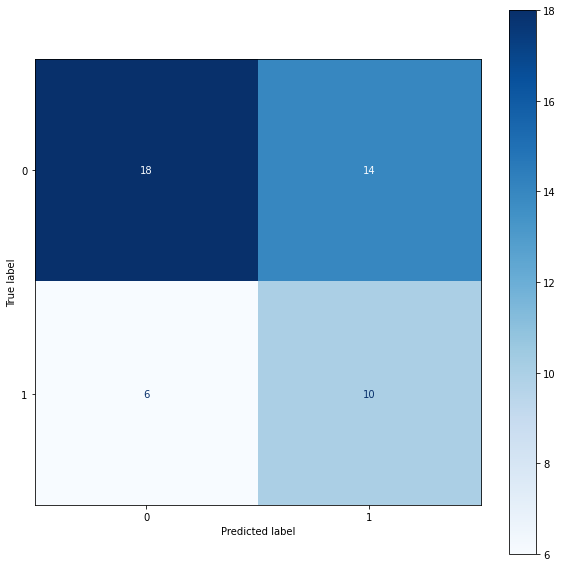

In [20]:
from sklearn import metrics

true_data = y_test
predicted_data = model.predict(x_test)
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(true_data.argmax(axis=1), predicted_data.argmax(axis=1))).plot(cmap='Blues')

In [21]:
no_arg = model.predict(x_dataset[:1])
no_arg.argmax(axis=1)

array([0], dtype=int64)

float64
(50, 50, 1)


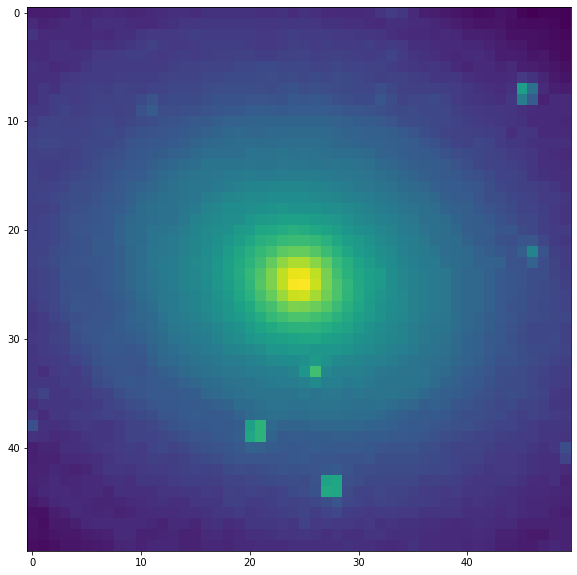

In [22]:
from matplotlib import image
from matplotlib import pyplot
# summarize shape of the pixel array
print(x_train[0].dtype)
print(x_train[0].shape)
# display the array of pixels as an image
pyplot.imshow(x_train[0])
pyplot.show()

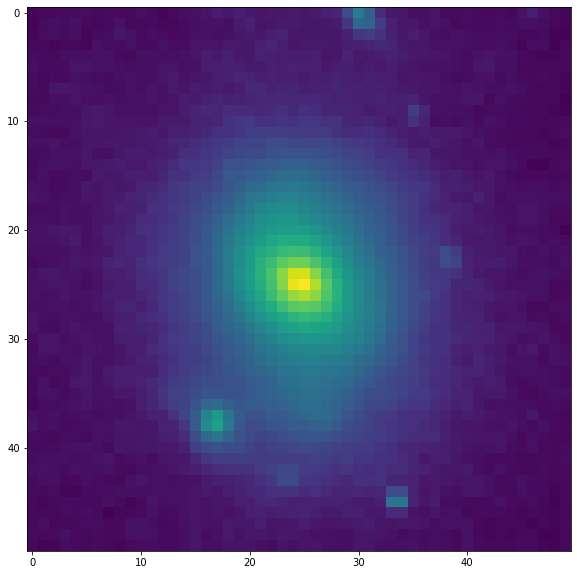

In [23]:
pyplot.imshow(x_train[1])
pyplot.show()

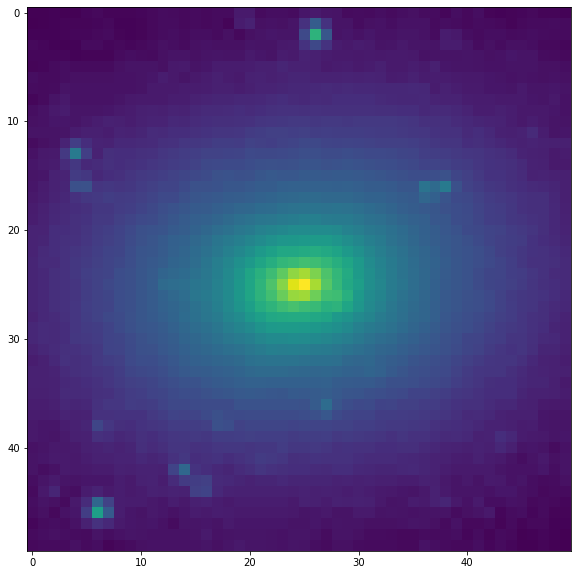

In [24]:
pyplot.imshow(x_train[2])
pyplot.show()